In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import usm_make
import usm_entropy

In [2]:
def ngon_coords(verts):
    radians=[]
    for k in range(verts):
        rad = (2*np.pi*k)/verts
        radians.append(rad)
    x_vals = np.cos(radians)
    y_vals =np.sin(radians)
    return x_vals, y_vals

<IPython.core.display.Javascript object>


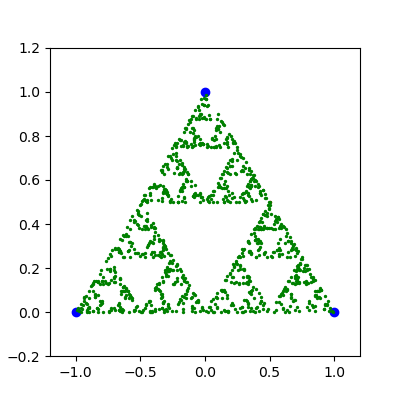

In [3]:
%matplotlib notebook
verts = 3
points = 3000
#x_vals, y_vals = ngon_coords(verts)
x_vals = np.array([-1, 0, 1])
y_vals = np.array([0, 1, 0])
vert_coords = np.column_stack((x_vals, y_vals))
xmin = x_vals.min() - 0.2
xmax = x_vals.max() + 0.2
ymin = y_vals.min() - 0.2
ymax = y_vals.max() + 0.2
#c is starting coordinate
c = np.array([0.5, 0.5])

#initiate figure instance
fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
scat, = ax.plot([],[])
"""
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.scatter(x=0.5, y=0.5, s=2, c='r', label='inital point')
ax.scatter(x_vals, y_vals, c='b', label='vertices')
"""
def init_frame():
    global ax
    ax.cla()
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
    ax.scatter(x=0.5, y=0.5, s=2, c='r', label='inital point')
    ax.scatter(x_vals, y_vals, c='b', label='vertices')
    #for i, xy in enumerate(zip(x_vals, y_vals)):
        #ax.annotate(f'{i}', xy, xycoords='data', xytext=xy, textcoords='offset points')
        
rng = np.random.default_rng()
coords = [c]
randints = rng.integers(0, verts, points)
chunks = 20
frame_chunks = points // chunks
for i in randints:
    coords.append((coords[-1] + vert_coords[i])/2)
def animation(i):
    i_from = i * chunks
    # are we on the last frame?
    if i_from + chunks > len(coords) - 1:
        i_to = len(coords) - 1
    else:
        i_to = i_from + chunks
    rows = coords[i_from:i_to]
    x, y = zip(*rows)
    ax.scatter(x, y, s=2, c='g')
    
ani = FuncAnimation(fig, animation, frames=frame_chunks, init_func=init_frame, interval=5, repeat=True, blit=True)
#from IPython.display import HTML
#HTML(ani.to_jshtml())

In [4]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [5]:
#ani.save('sierpinski_cgr.gif', )

In [6]:
ss = np.random.SeedSequence()
entropy = ss.entropy
print(entropy)

215430854151290393940792250968974688025


In [7]:
t = np.array([[1, 2], [3, 4]])
t[0]

array([1, 2])